In [231]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
df = pd.read_csv("Social_Network_Ads.csv")
LE = LabelEncoder()
df["Gender"] = LE.fit_transform(df["Gender"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [124]:
def decision_tree(columns: List[str], df=df) -> DecisionTreeClassifier:
    # extract values from dataframe as ndarray
    X = df[columns].values
    y = df.iloc[:, -1].values
    
    # split test/train(ing) data & scale numerical data
    SC = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    X_train = SC.fit_transform(X_train)
    X_test = SC.fit_transform(X_test)
    
    # train decision tree on data
    DT = DecisionTreeClassifier(criterion="entropy", random_state=0)
    DT.fit(X_train, y_train)
    
    return [DT, accuracy_score(y_test, DT.predict(X_test))]

In [125]:
# Generate every arrangement of features,
#   then generate decision tree with them
from itertools import combinations
features = ["Gender", "Age", "EstimatedSalary"]
list(combinations(features, r=2))

[('Gender', 'Age'), ('Gender', 'EstimatedSalary'), ('Age', 'EstimatedSalary')]

In [196]:
# generate every combination of length n from 1 to 3
trees = []
scores = []
for n in range(1, len(features)+1): 
    for c in combinations(features, n):
        # DecisionTreeClassifier, accuracy_score, features
        t, s = decision_tree(list(c))
        trees.append([t, c])
        scores.append(s)

Features: ('Gender', 'Age', 'EstimatedSalary')
Accuracy: 0.91


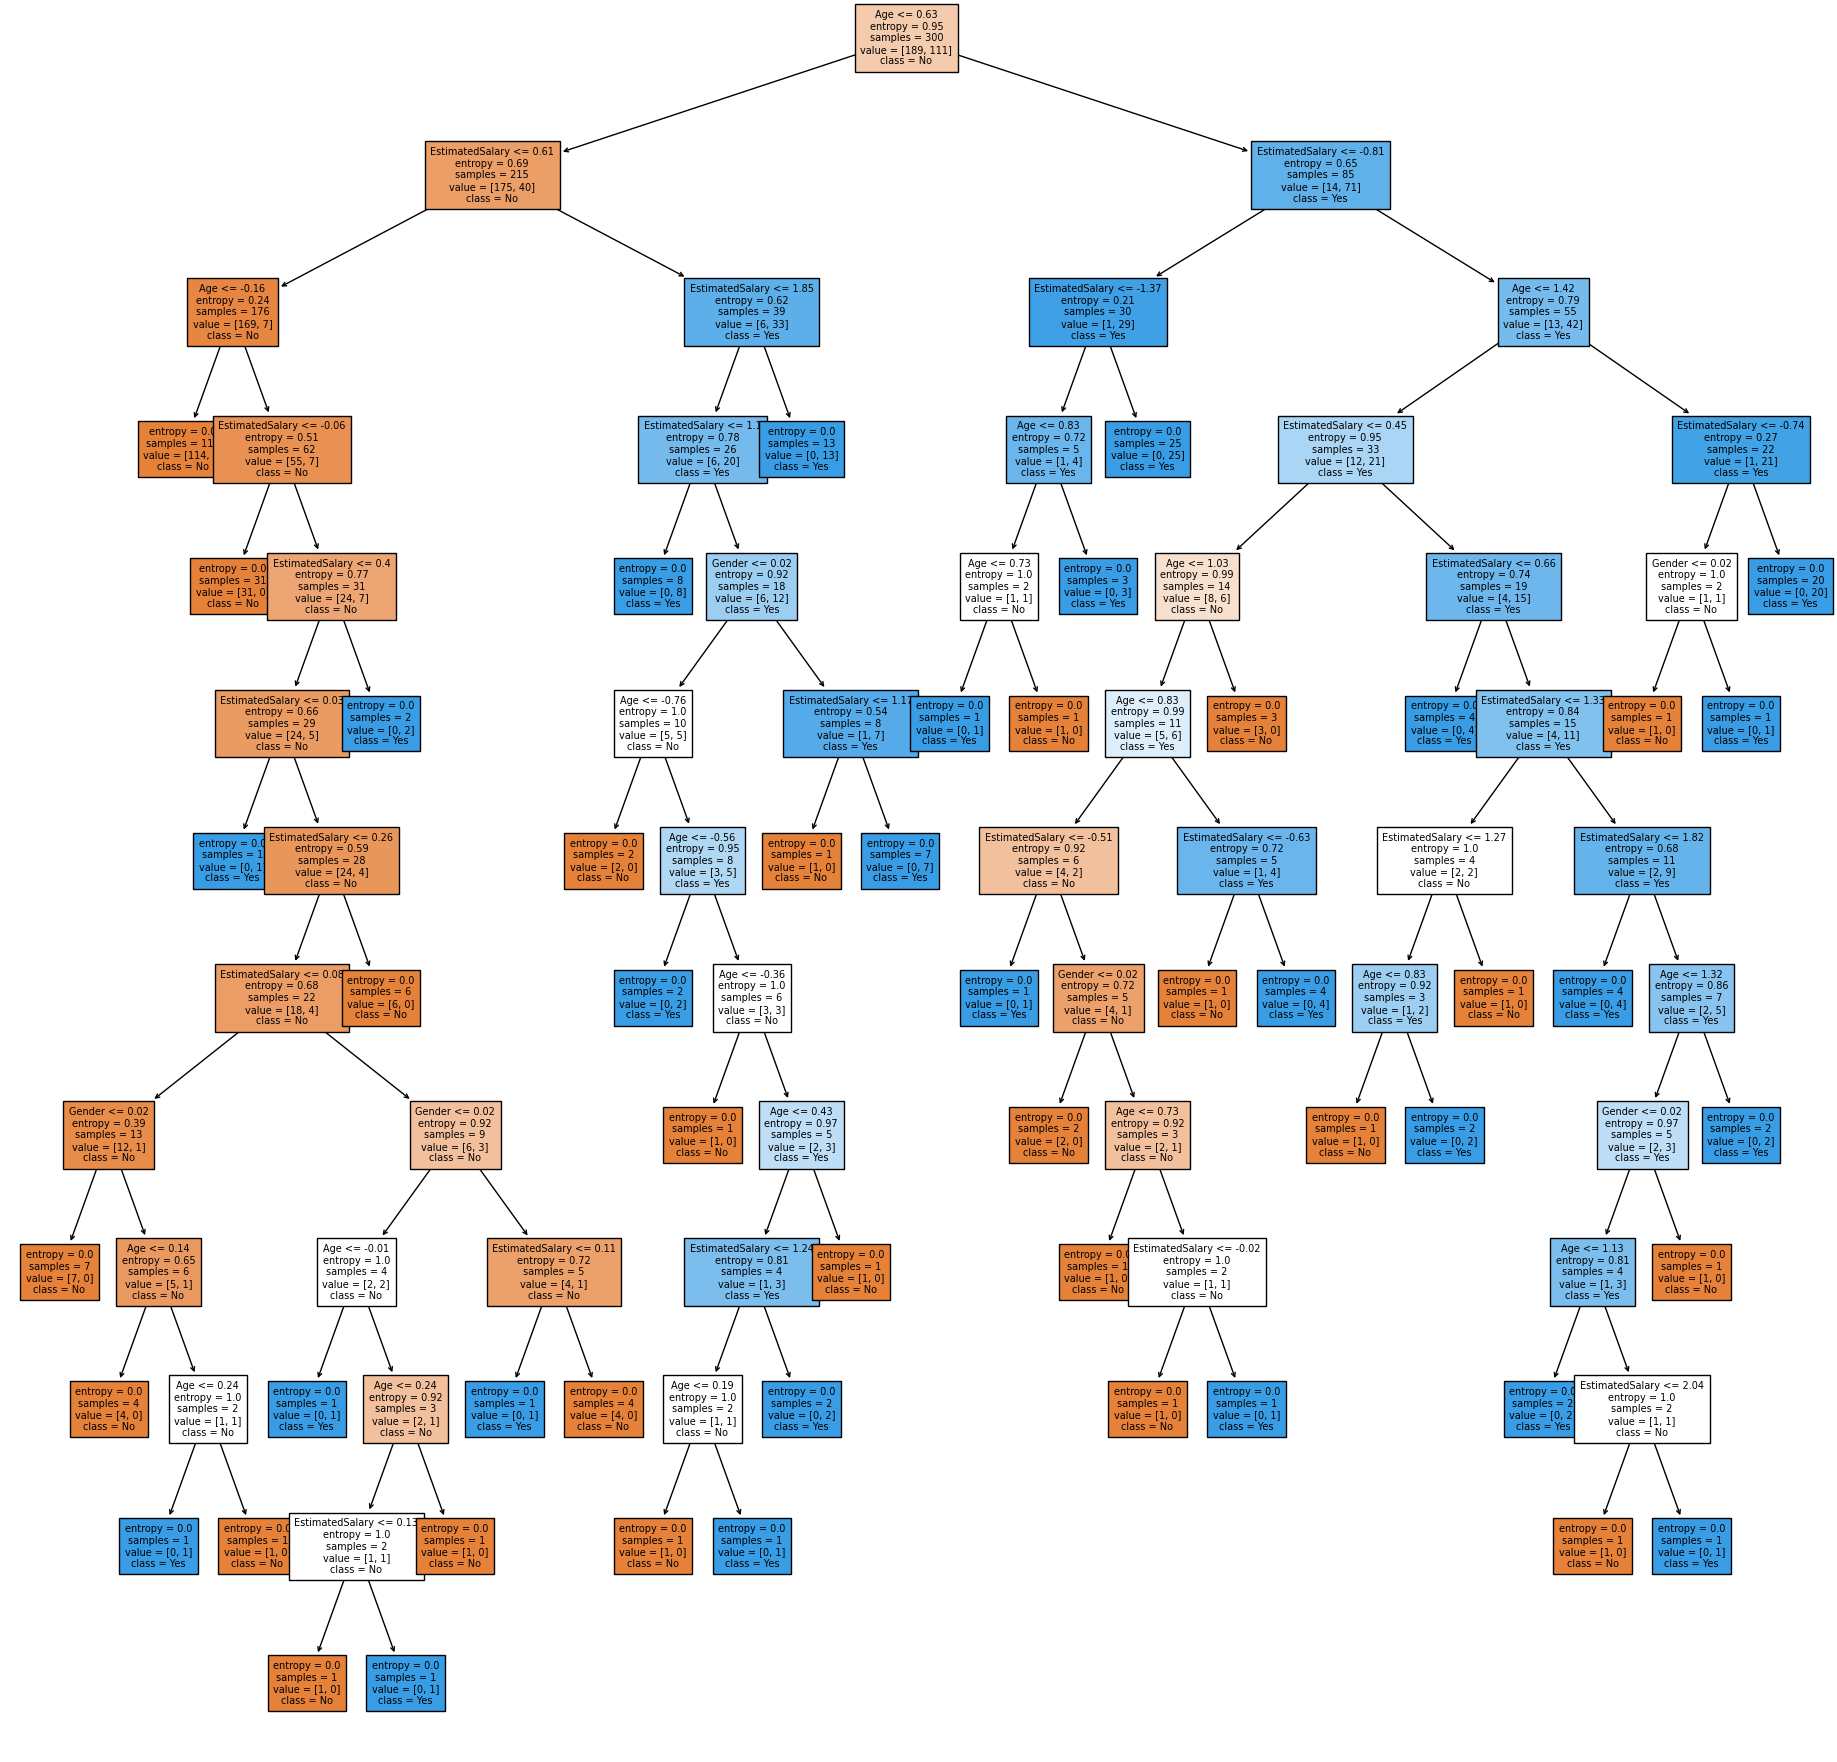

In [260]:
tree = trees[scores.index(max(scores))]
print(f"Features: {tree[1]}\nAccuracy: {max(scores)}")

plt.figure(figsize=(17, 17), dpi=100)
plot_tree(tree[0], fontsize=7, precision=2,
        feature_names=tree[1], 
        filled=True,
        class_names=["No", "Yes"]
)

plt.show()